<a href="https://colab.research.google.com/github/sanjaya999/Pytorch/blob/main/neuralNetworkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import sklearn

In [97]:
from sklearn.datasets import make_circles

nSamples = 1000;

#create circle

X , y = make_circles(nSamples , noise = 0.03 , random_state=42)

len(X) , len(y)

(1000, 1000)

In [98]:
print(type(X))  # Expected: <class 'numpy.ndarray'>
print(type(y))  # Expected: <class 'numpy.ndarray'>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [99]:
print(f"first 5 x {X[:5]}")
print(f"first 5 y {y[:5]}")

first 5 x [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 y [1 1 1 1 0]


In [100]:
#make datafram of circle data

import pandas as pd

circles = pd.DataFrame({"x1:" : X[:,0],
                        "x2:" : X[:, 1 ],
                        "label" : y})

circles.head(5)

,x1:,x2:,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


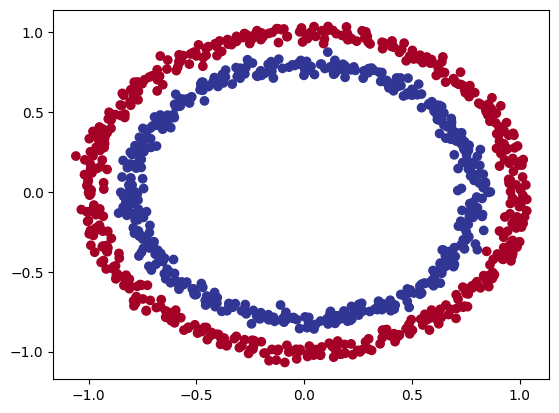

In [101]:
#visualize
import matplotlib.pyplot as plt

plt.scatter(x = X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [102]:
X.shape , y.shape

((1000, 2), (1000,))

In [103]:
X_sample = X[0]
y_sample = y[0]

X_sample , y_sample

(array([0.75424625, 0.23148074]), np.int64(1))

In [104]:
#turn data into tensors an test and train splits

import torch

torch.__version__

'2.6.0+cu124'

In [105]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5] ,y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [106]:
print(type(X))  # Expected: <class 'torch.Tensor'>
print(type(y))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [107]:
print(X.dtype)  # Expected: torch.float32
print(y.dtype)

torch.float32
torch.float32


In [108]:
#split data into training and test

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.2 ,
                                                       random_state=42)

In [109]:
len(X_train ) , len(X_test),len(y_train ) , len(y_test)

(800, 200, 800, 200)

In [110]:

import torch
from torch import nn

#make device agonistic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [111]:
#create model
from sklearn import datasets

class CircleModelv1(nn.Module):
  def __init__(self):
    super().__init__()
    #create 2 nn.Linear layer capable of handling the shapes of our data
    #self.layer_1 = nn.Linear(in_features=2 , out_features=5) # takes in 2 f and upscales to 5 features

   # self.layer_2 = nn.Linear(in_features=5 , out_features=1) # takes in 5f from pervious layer and outputs 1 f ie same shape as y

    self.two_linear_layer = nn.Sequential(
        nn.Linear(in_features=2 , out_features=5),
        nn.Linear(in_features=5 , out_features=1)
    )
    #forward method outlines the forward path
    def forward(self , x):
     # return self.layer_2(self.layer_1(x))#x->layer1 -> layer2
     return two_linear_layer(x)

#instantiate the instance of our model class and send it to  the target device

model_0 = CircleModelv1().to(device)
model_0


CircleModelv1(
  (two_linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [112]:
#replicate the module above using nn.swquential
model_0 = nn.Sequential(
    nn.Linear(in_features=2 , out_features=5),
    nn.Linear(in_features=5 , out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [113]:

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [114]:
#make predictions

with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(torch.round(untrained_preds[:10]))
print(y_test[:10])

tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [115]:
#setup loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss() # has sigmoid activation function built in
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.1
                            )

In [116]:
#calculate accuracy
def accuracy_fn(y_true , y_pred):
  correct = torch.eq(y_true , y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

#raw output of our model is logits
#we can vonvert these logist to prediction probabilities by passing them to some kind of activation function ie sigmoid for binary classificatio and softmax for multiclass classification


In [117]:
#view 1st 5 output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [118]:
#use sigmoid activation function
#prediction probability
y_pred_probs = torch.sigmoid(y_logits)
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [119]:
#find predictied labels
y_pred = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_pred.squeeze(), y_pred_labels.squeeze()))

y_pred.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [120]:
#training loop
torch.manual_seed(42)

epochs = 10000

#put data into the target device
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)


# training and evaluation loop
for epoch in range(epochs):
  model_0.train()

  #forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true = y_train , y_pred = y_pred)

  #optimizer
  optimizer.zero_grad()

  #lossbackward
  loss.backward()

  #optimizer step -> gradient descent

  optimizer.step()

  ###testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calculate test loss /acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test , y_pred=test_pred)


#print out whats happening4.
  if epoch % 10 ==0:
    print(f"epoch: {epoch} | loss: {loss:.5f} , acc: {acc:2f}% | test loss: {test_loss:.5f} , testacc: {test_acc:.2f}%")

epoch: 0 | loss: 0.69796 , acc: 51.875000% | test loss: 0.69440 , testacc: 58.00%
epoch: 10 | loss: 0.69590 , acc: 51.250000% | test loss: 0.69305 , testacc: 53.00%
epoch: 20 | loss: 0.69490 , acc: 51.625000% | test loss: 0.69254 , testacc: 49.50%
epoch: 30 | loss: 0.69435 , acc: 51.125000% | test loss: 0.69236 , testacc: 49.50%
epoch: 40 | loss: 0.69401 , acc: 50.875000% | test loss: 0.69232 , testacc: 51.00%
epoch: 50 | loss: 0.69378 , acc: 50.250000% | test loss: 0.69234 , testacc: 50.00%
epoch: 60 | loss: 0.69362 , acc: 50.000000% | test loss: 0.69239 , testacc: 51.50%
epoch: 70 | loss: 0.69351 , acc: 50.250000% | test loss: 0.69246 , testacc: 51.00%
epoch: 80 | loss: 0.69342 , acc: 49.875000% | test loss: 0.69254 , testacc: 50.00%
epoch: 90 | loss: 0.69336 , acc: 49.875000% | test loss: 0.69262 , testacc: 53.00%
epoch: 100 | loss: 0.69331 , acc: 49.250000% | test loss: 0.69271 , testacc: 53.00%
epoch: 110 | loss: 0.69327 , acc: 49.750000% | test loss: 0.69279 , testacc: 54.00%
epo

In [121]:
#4. make predictions and evalulate model by visulaizing as out model isnt learning anything

import requests
from pathlib import Path

if Path("helper_function.py").is_file():
  print("helper_function.py already exists")
else:
  print("downloading helper_function.py")
  request  = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py" , "wb") as f:
    f.write(request.content)

from helper_function import plot_predictions , plot_decision_boundary


helper_function.py already exists


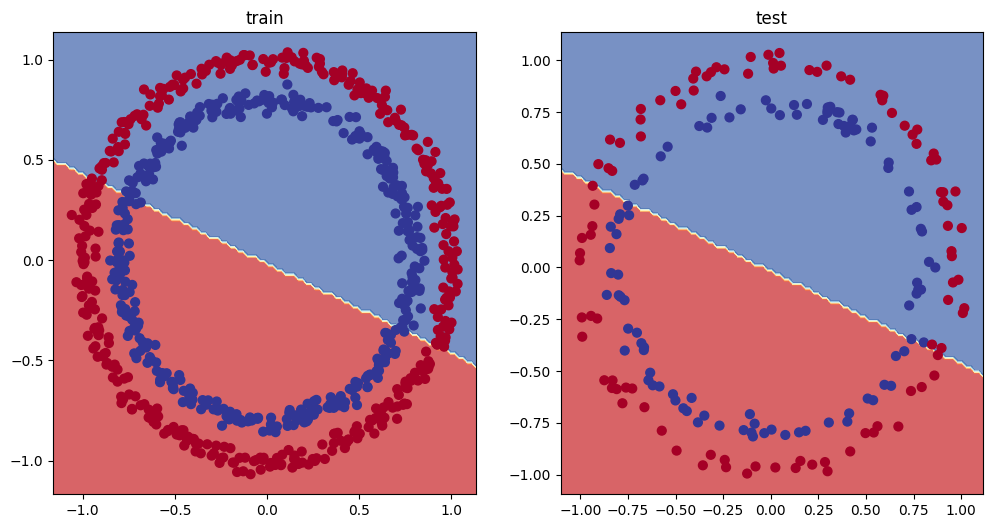

In [122]:
plt.figure(figsize = (12 , 6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0 , X_train , y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0 , X_test , y_test)

In [123]:
#improving a model
class CircleModelvv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2 , out_features=10)
    self.layer_2 = nn.Linear(in_features=10 , out_features=10)
    self.layer_3 = nn.Linear(in_features=10 , out_features=1)

  def forward(self , x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelvv1().to(device)
model_1


CircleModelvv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [124]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_1.parameters() , lr=0.01)


In [125]:
torch.manual_seed(42)

epochs =10

X_train, y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

for epoch in range (epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.relu(y_logits))

  loss = loss_fn(y_logits , y_train)

  acc = accuracy_fn(y_true=y_train , y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.relu(test_logits))

    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy_fn(y_true=y_test , y_pred=test_pred)

    print(f"epoch: {epoch} | loss: {loss:.5f} , acc: {acc:2f}% | test loss: {test_loss:.5f} , testacc: {test_acc:.2f}%")

epoch: 0 | loss: 0.69396 , acc: 50.000000% | test loss: 0.69261 , testacc: 50.00%
epoch: 1 | loss: 0.69395 , acc: 50.000000% | test loss: 0.69261 , testacc: 50.00%
epoch: 2 | loss: 0.69395 , acc: 50.000000% | test loss: 0.69261 , testacc: 50.00%
epoch: 3 | loss: 0.69394 , acc: 50.000000% | test loss: 0.69261 , testacc: 50.00%
epoch: 4 | loss: 0.69394 , acc: 50.000000% | test loss: 0.69261 , testacc: 50.00%
epoch: 5 | loss: 0.69394 , acc: 50.000000% | test loss: 0.69261 , testacc: 50.00%
epoch: 6 | loss: 0.69394 , acc: 50.000000% | test loss: 0.69261 , testacc: 50.00%
epoch: 7 | loss: 0.69393 , acc: 50.000000% | test loss: 0.69261 , testacc: 50.00%
epoch: 8 | loss: 0.69393 , acc: 50.000000% | test loss: 0.69261 , testacc: 50.00%
epoch: 9 | loss: 0.69393 , acc: 50.000000% | test loss: 0.69261 , testacc: 50.00%


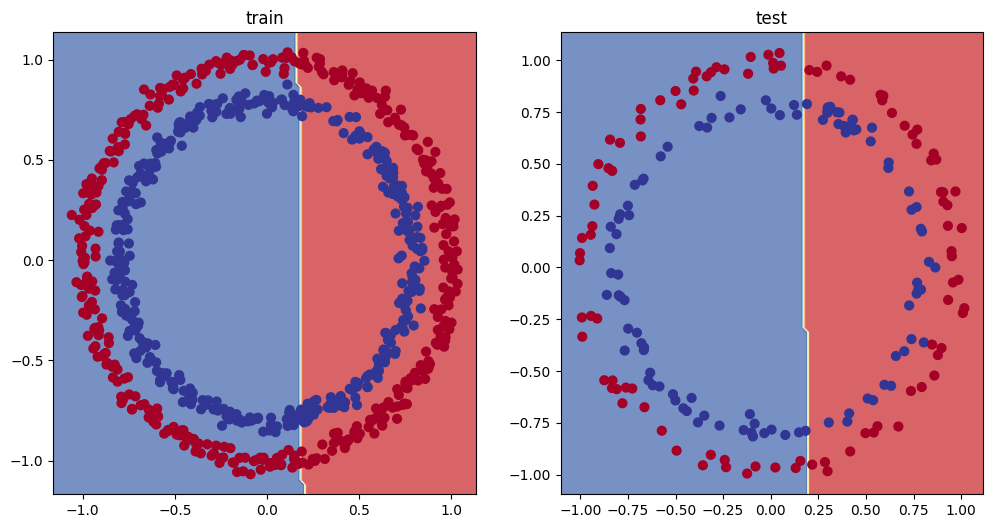

In [126]:
plt.figure(figsize = (12 , 6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1 , X_train , y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1 , X_test , y_test)

In [127]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [128]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


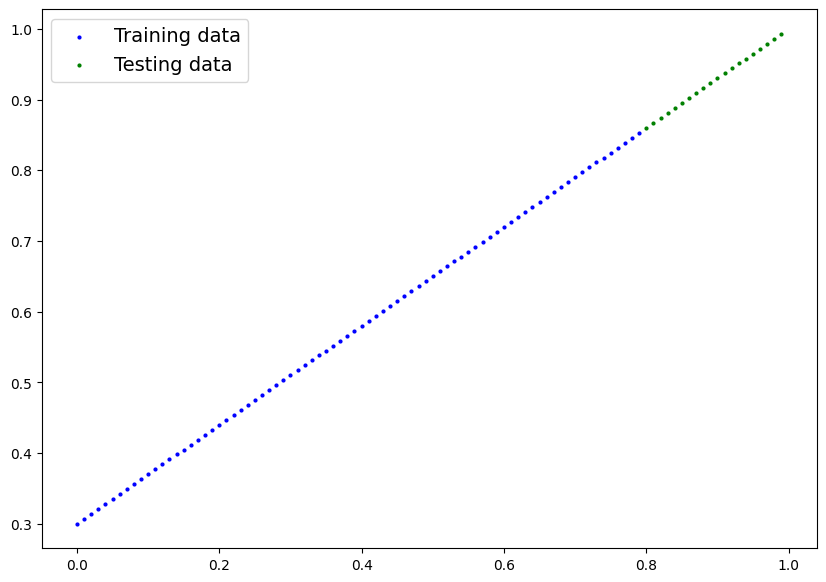

In [129]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [130]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [131]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.001)

In [132]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 10000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening


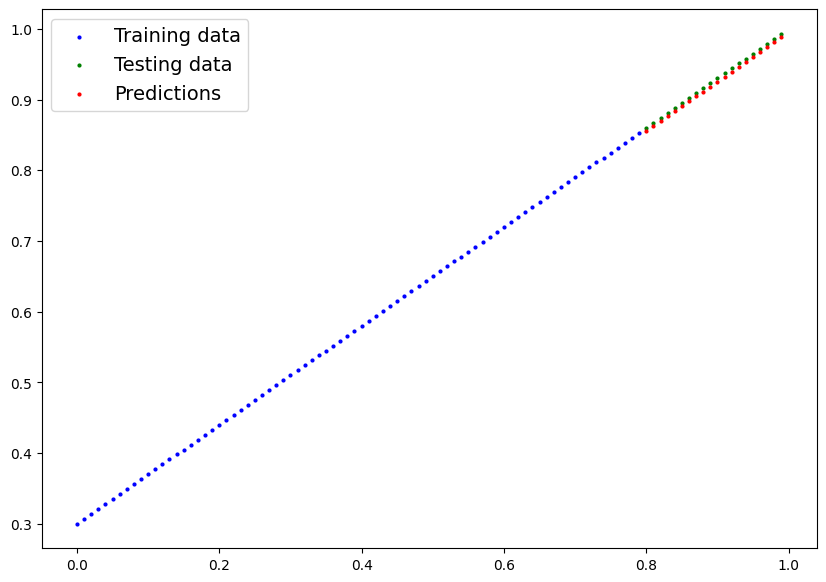

In [133]:
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

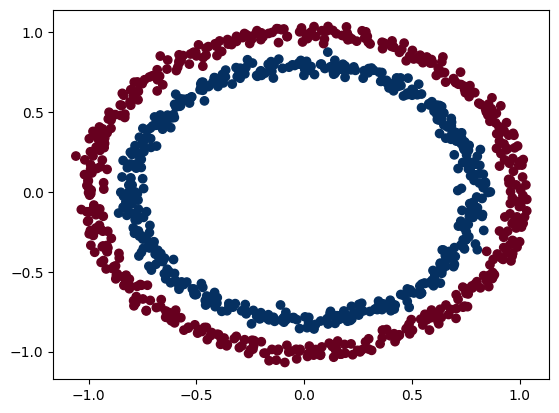

In [142]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [143]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [144]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [145]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [138]:
#spam or not , creditcard fraud or not , insurance claim one or other

In [149]:
# Fit the model
torch.manual_seed(42)
epochs = 1

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.00273, Accuracy: 100.00% | Test Loss: 0.01237, Test Accuracy: 99.50%


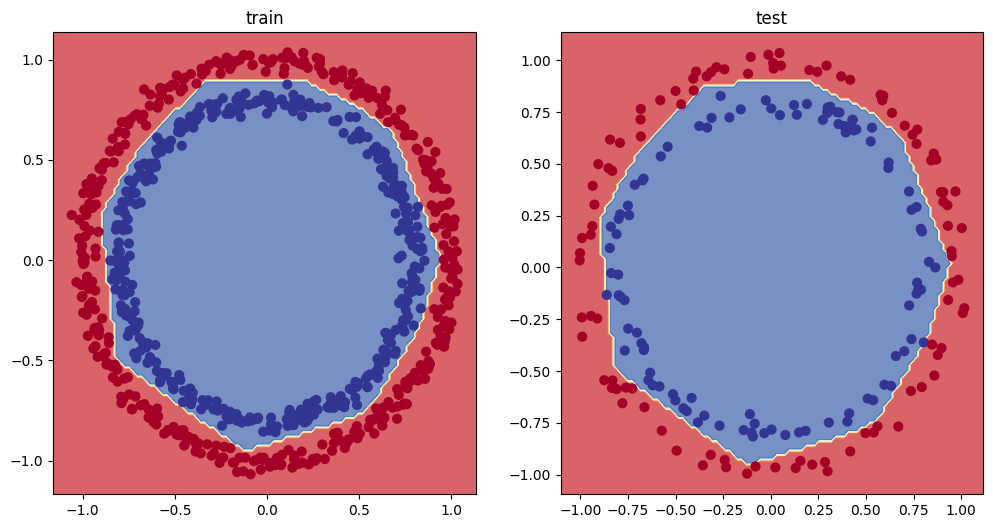

In [151]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3 , X_train , y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3 , X_test , y_test)

In [154]:
A= torch.arange(-10,10,dtype=torch.float32)
A.dtype

torch.float32

In [155]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

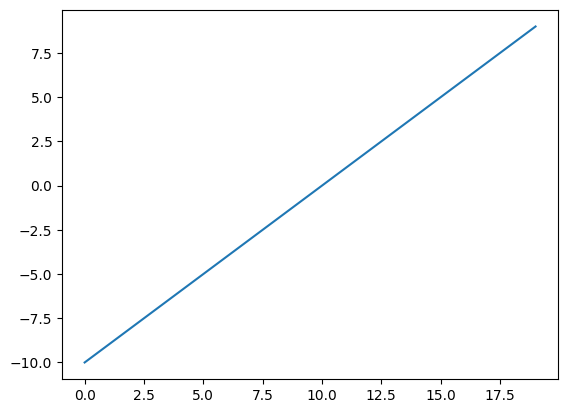

In [156]:
#visualize

plt.plot(A);

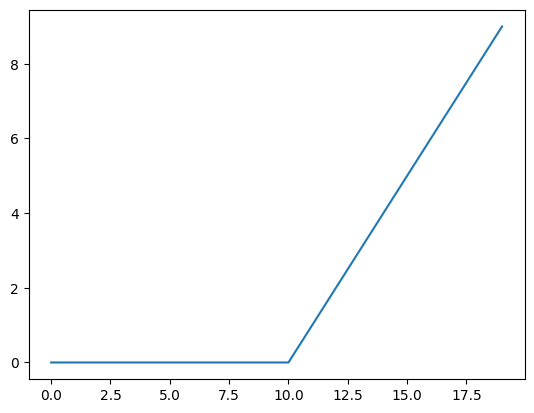

In [157]:
plt.plot(torch.relu(A))

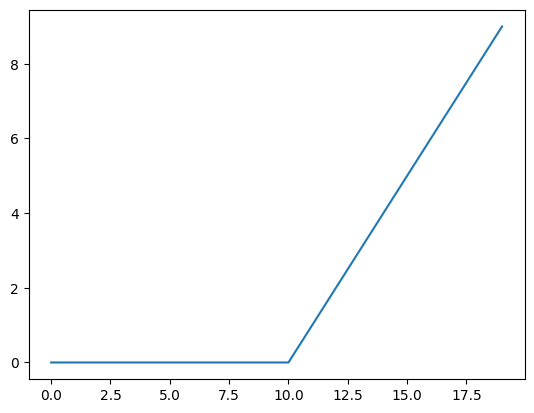

In [158]:
def relu(x:torch.Tensor)->torch.Tensor:
  return torch.maximum(torch.tensor(0) , x)
plt.plot(relu(A))

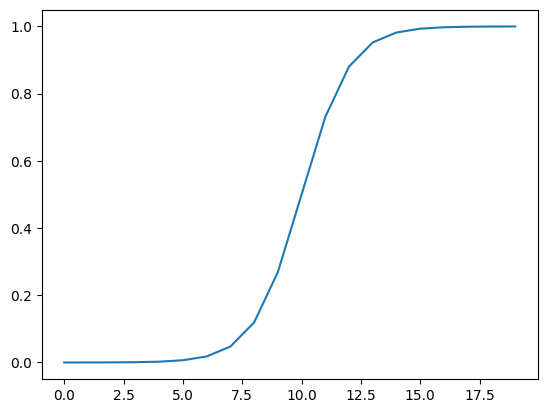

In [159]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

plt.plot(sigmoid(A))